## Buffalization Data Visualization Challenge



### 1) Problem statement
- Create a data visualization using a dataset of CU Boulder trees


### 2) Data Collection
- The dataset is a .csv file with information on 777 trees in the campus historic district (Norlin Quad and adjacent areas).
- The data consists of 11 column and 777 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [91]:
%pwd

'/Users/sheetal/Desktop/Study/Machine_Learning/Data Visualization Challenge'

#### Import the CSV Data as Pandas DataFrame

In [92]:
df = pd.read_csv('data/Data_Viz_Challenge_2025-UCB_Trees.csv')

#### Show Top 5 Records

In [93]:
df.head()

,OBJECTID,Tree ID,Tree Type,Genus,Species,Cultivar or Varietal,Common Name,Canopy Spread,Height,Latitude,Longitude
0,1,10146,DECIDUOUS,Quercus,bicolor,NaN,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,2,10150,DECIDUOUS,Gymnocladus,dioicus,NaN,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,3,10041,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,4,10042,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,5,10051,DECIDUOUS,Crataegus,NaN,NaN,Hawthorne,18.0,20.0,40.008870,-105.275428


#### Shape of the dataset

In [94]:
df.shape

(777, 11)

In [95]:
df.head()

,OBJECTID,Tree ID,Tree Type,Genus,Species,Cultivar or Varietal,Common Name,Canopy Spread,Height,Latitude,Longitude
0,1,10146,DECIDUOUS,Quercus,bicolor,NaN,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,2,10150,DECIDUOUS,Gymnocladus,dioicus,NaN,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,3,10041,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,4,10042,DECIDUOUS,Quercus,rubra,NaN,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,5,10051,DECIDUOUS,Crataegus,NaN,NaN,Hawthorne,18.0,20.0,40.008870,-105.275428


### 2.2 Dataset information

- OBJECTID : Column id
- Tree Id : id assigned to a tree
- Tree Type : types of tree 
- Genus 
- Species 
- Cultivar or Varietal
- Canopy Spread
- Latitude
- Height                    
- Longitude    

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [96]:
df.isna().sum()

OBJECTID                  0
Tree ID                   0
Tree Type                 0
Genus                     0
Species                 196
Cultivar or Varietal    770
Common Name               1
Canopy Spread             4
Height                    1
Latitude                  0
Longitude                 0
dtype: int64

#### There are  missing values in the data set for column Species, Cultivar or Varietal, Common name, Canopy Spread, Height

### 3.2 Check Duplicates

In [97]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [98]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              777 non-null    int64  
 1   Tree ID               777 non-null    int64  
 2   Tree Type             777 non-null    object 
 3   Genus                 777 non-null    object 
 4   Species               581 non-null    object 
 5   Cultivar or Varietal  7 non-null      object 
 6   Common Name           776 non-null    object 
 7   Canopy Spread         773 non-null    float64
 8   Height                776 non-null    float64
 9   Latitude              777 non-null    float64
 10  Longitude             777 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 66.9+ KB


### 3.4 Checking the number of unique values of each column

In [99]:
df.nunique()

OBJECTID                777
Tree ID                 762
Tree Type                 2
Genus                    48
Species                  58
Cultivar or Varietal      5
Common Name             105
Canopy Spread            48
Height                   79
Latitude                775
Longitude               767
dtype: int64

### 3.5 Handling Null Values

In [100]:
df.drop(columns=['OBJECTID'], inplace=True)

In [101]:
# Step 1: Compute the most common species for each Genus
most_common_species = df.groupby('Genus')['Species'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Fill missing species based on the most common species for that Genus
df['Species'] = df.apply(lambda row: most_common_species.get(row['Genus'], None) if pd.isna(row['Species']) else row['Species'], axis=1)

# Step 3: Replace remaining NaN values in 'Species' with "None"
df['Species'] = df['Species'].fillna("None")



In [102]:
# Step 1: Compute the most common "common name" for each Genus
most_common_name = df.groupby('Genus')['Common Name'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
# Step 2: Fill missing common name based on the most common "common name" for that Genus
df['Common Name'] = df.apply(lambda row: most_common_species.get(row['Genus'], None) if pd.isna(row['Common Name']) else row['Common Name'], axis=1)


In [103]:
# Step 1: Compute the most common height for each Genus
most_common_height = df.groupby('Genus')['Height'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Fill missing height based on the most common height for that Genus
df['Height'] = df.apply(lambda row: most_common_height.get(row['Genus'], None) if pd.isna(row['Height']) else row['Height'], axis=1)

In [104]:
# Step 1: Compute the mean Canopy Spread for each Genus (ignoring NaN values)
mean_canopy_spread = df.groupby('Genus')['Canopy Spread'].mean()

# Step 2: Fill missing Canopy Spread values with the mean for that Genus
df['Canopy Spread'] = df.apply(lambda row: mean_canopy_spread.get(row['Genus'], None) if pd.isna(row['Canopy Spread']) else row['Canopy Spread'], axis=1)

In [105]:
df_updated = df.drop(columns=['Cultivar or Varietal'])

In [84]:
df_updated.isna().sum()

Tree ID          0
Tree Type        0
Genus            0
Species          0
Common Name      0
Canopy Spread    0
Height           0
Latitude         0
Longitude        0
dtype: int64

### 3.6 Check statistics of data set

In [85]:
df_updated.describe()

,Tree ID,Canopy Spread,Height,Latitude,Longitude
count,777.000000,777.000000,777.000000,777.000000,777.000000
mean,12109.353925,19.359455,34.755470,40.009197,-105.273815
std,1309.271980,10.931589,18.917467,0.000820,0.001288
min,10013.000000,3.000000,0.000000,40.007060,-105.276503
25%,10759.000000,12.000000,20.000000,40.008581,-105.274788
50%,12547.000000,16.000000,35.000000,40.009273,-105.273957
75%,12989.000000,25.000000,47.000000,40.009944,-105.272868
max,15694.000000,65.000000,102.000000,40.010393,-105.270165


### 3.7 Exploring Data

In [86]:
# save the cleaned data
df_updated.to_csv('data/cleaned_data.csv', index=False)

In [87]:
df_updated.head()

,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
0,10146,DECIDUOUS,Quercus,bicolor,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,10150,DECIDUOUS,Gymnocladus,dioicus,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,10041,DECIDUOUS,Quercus,rubra,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,10042,DECIDUOUS,Quercus,rubra,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,10051,DECIDUOUS,Crataegus,mollis,Hawthorne,18.0,20.0,40.008870,-105.275428


In [88]:
print("Categories in 'Tree Type' variable:     ",end=" " )
print(df_updated['Tree Type'].unique())

print("Top 5 categories in 'Genus' variable:  ",end=" ")
print(df_updated['Genus'].unique()[:5])

print("Top 5 categories in'Species' variable:",end=" " )
print(df_updated['Species'].unique()[:5])

print("Top 5 categories in 'Common Name' variable:     ",end=" " )
print(df_updated['Common Name'].unique()[:5])

print("Categories in 'Cultivar or Varietal' variable:     ",end=" " )
print(df['Cultivar or Varietal'].unique())

Categories in 'Tree Type' variable:      ['DECIDUOUS' 'CONIFEROUS']
Top 5 categories in 'Genus' variable:   ['Quercus' 'Gymnocladus' 'Crataegus' 'Gleditsia' 'Sorbus']
Top 5 categories in'Species' variable: ['bicolor' 'dioicus' 'rubra' 'mollis' 'triacanthos']
Top 5 categories in 'Common Name' variable:      ['Swamp White Oak' 'Kentucky Coffeetree' 'Northern Red Oak' 'Hawthorne'
 'Honey Locust']
Categories in 'Cultivar or Varietal' variable:      [nan 'Pacific Sunset' 'Grandiflora' '"Heritage"  Bur\\English hybrid'
 'Rocky Mtn Glow' 'Caddo']


In [67]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_updated.columns if df_updated[feature].dtype != 'O']
categorical_features = [feature for feature in df_updated.columns if df_updated[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Tree ID', 'Canopy Spread', 'Height', 'Latitude', 'Longitude']

We have 4 categorical features : ['Tree Type', 'Genus', 'Species', 'Common Name']


In [68]:
# Apply lowercasing and space removal for each categorical column
for col in categorical_features:
    df_updated[col] = df_updated[col].str.strip().str.lower()

print(df_updated.head())

   Tree ID  Tree Type        Genus  Species          Common Name  \
0    10146  deciduous      quercus  bicolor      swamp white oak   
1    10150  deciduous  gymnocladus  dioicus  kentucky coffeetree   
2    10041  deciduous      quercus    rubra     northern red oak   
3    10042  deciduous      quercus    rubra     northern red oak   
4    10051  deciduous    crataegus   mollis            hawthorne   

   Canopy Spread  Height   Latitude   Longitude  
0           19.0    21.0  40.009104 -105.272529  
1           31.0    47.0  40.009136 -105.272797  
2           65.0   102.0  40.008888 -105.274886  
3           42.0    54.0  40.008775 -105.275000  
4           18.0    20.0  40.008870 -105.275428  


In [22]:
# Calculate the mean of 'Height' column
mean_height = df_updated['Height'].mean()

# Filter rows where 'Height' is less than or equal to the mean height
height_less_than_mean = df_updated[df_updated['Height'] <= mean_height]

print(f"Number of trees with height less than or equal to the mean height: {height_less_than_mean.shape[0]}")

Number of trees with height less than or equal to the mean height: 376


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

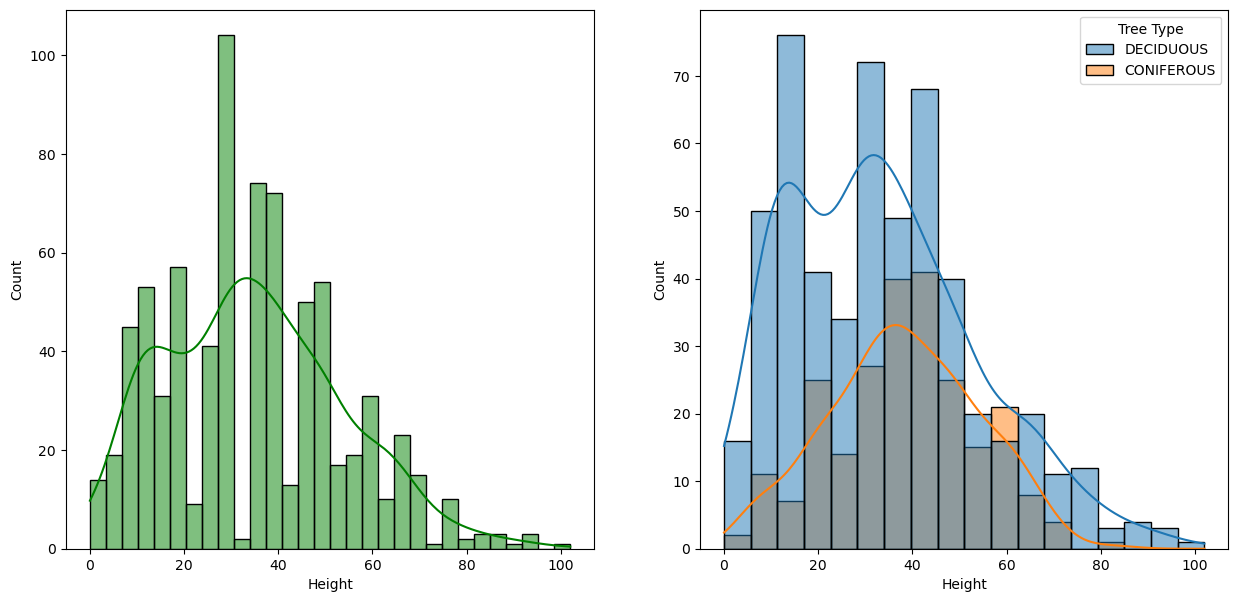

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_updated,x='Height',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Height',kde=True,hue='Tree Type')
plt.show()

In [29]:
# Get top 5 categories based on frequency
top_5_genus = df_updated['Genus'].value_counts().index[:5]
top_5_species = df_updated['Species'].value_counts().index[:5]
top_5_common_name = df_updated['Common Name'].value_counts().index[:5]

# Compute average height for each category
avg_height_genus = df_updated[df_updated['Genus'].isin(top_5_genus)].groupby('Genus')['Height'].mean()
avg_height_species = df_updated[df_updated['Species'].isin(top_5_species)].groupby('Species')['Height'].mean()
avg_height_common_name = df_updated[df_updated['Common Name'].isin(top_5_common_name)].groupby('Common Name')['Height'].mean()


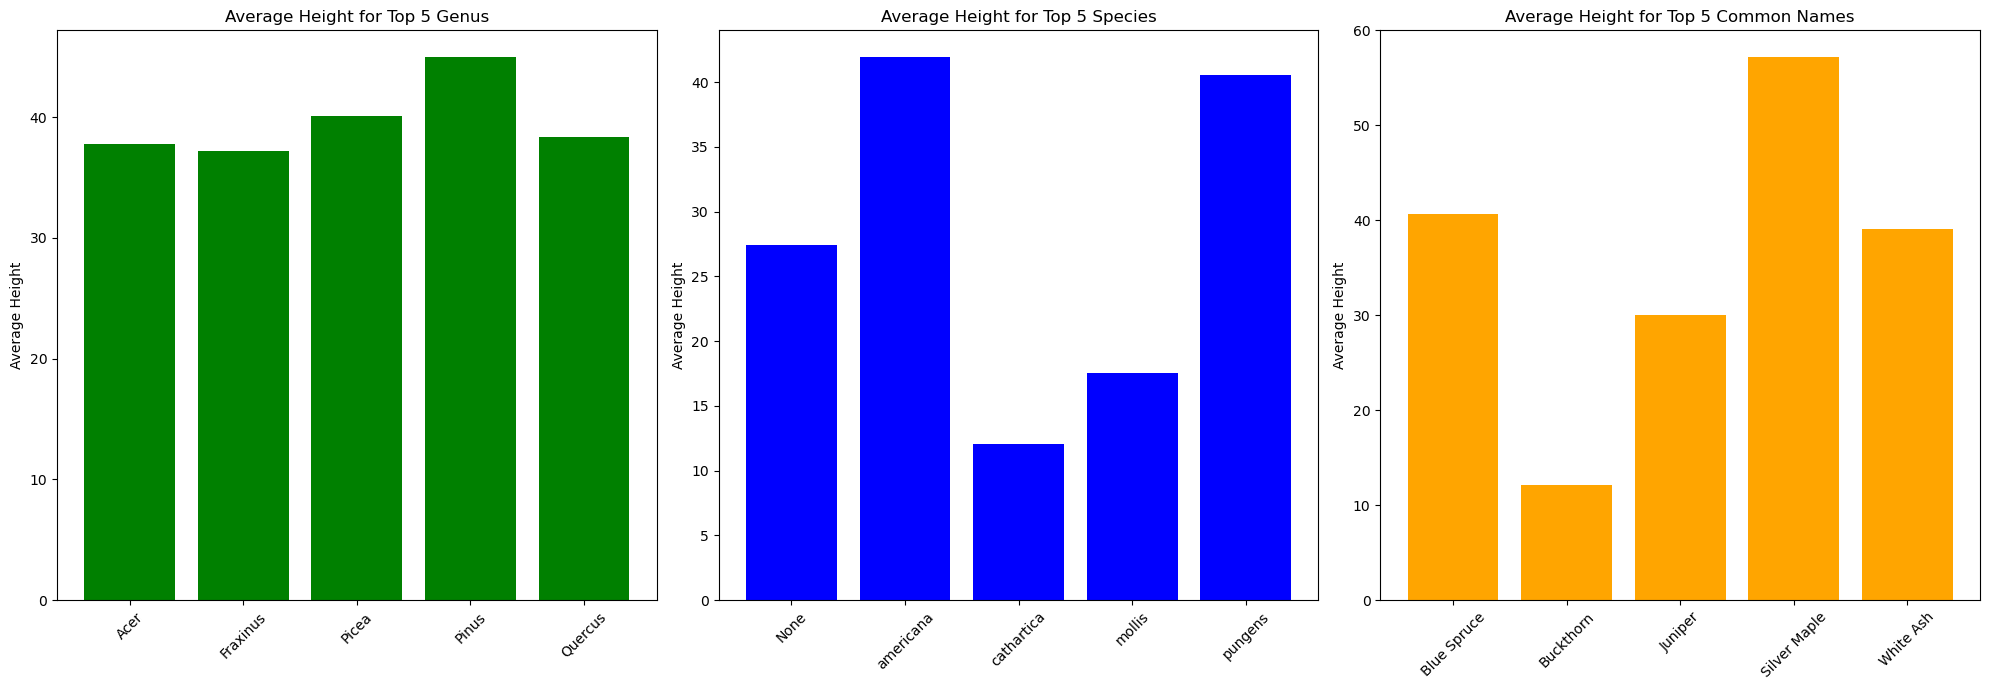

In [30]:
# Plot the bar charts
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# Plot for Genus
axs[0].bar(avg_height_genus.index, avg_height_genus.values, color='green')
axs[0].set_title("Average Height for Top 5 Genus")
axs[0].set_ylabel("Average Height")
axs[0].set_xticklabels(avg_height_genus.index, rotation=45)

# Plot for Species
axs[1].bar(avg_height_species.index, avg_height_species.values, color='blue')
axs[1].set_title("Average Height for Top 5 Species")
axs[1].set_ylabel("Average Height")
axs[1].set_xticklabels(avg_height_species.index, rotation=45)

# Plot for Common Name
axs[2].bar(avg_height_common_name.index, avg_height_common_name.values, color='orange')
axs[2].set_title("Average Height for Top 5 Common Names")
axs[2].set_ylabel("Average Height")
axs[2].set_xticklabels(avg_height_common_name.index, rotation=45)

plt.tight_layout()
plt.show()

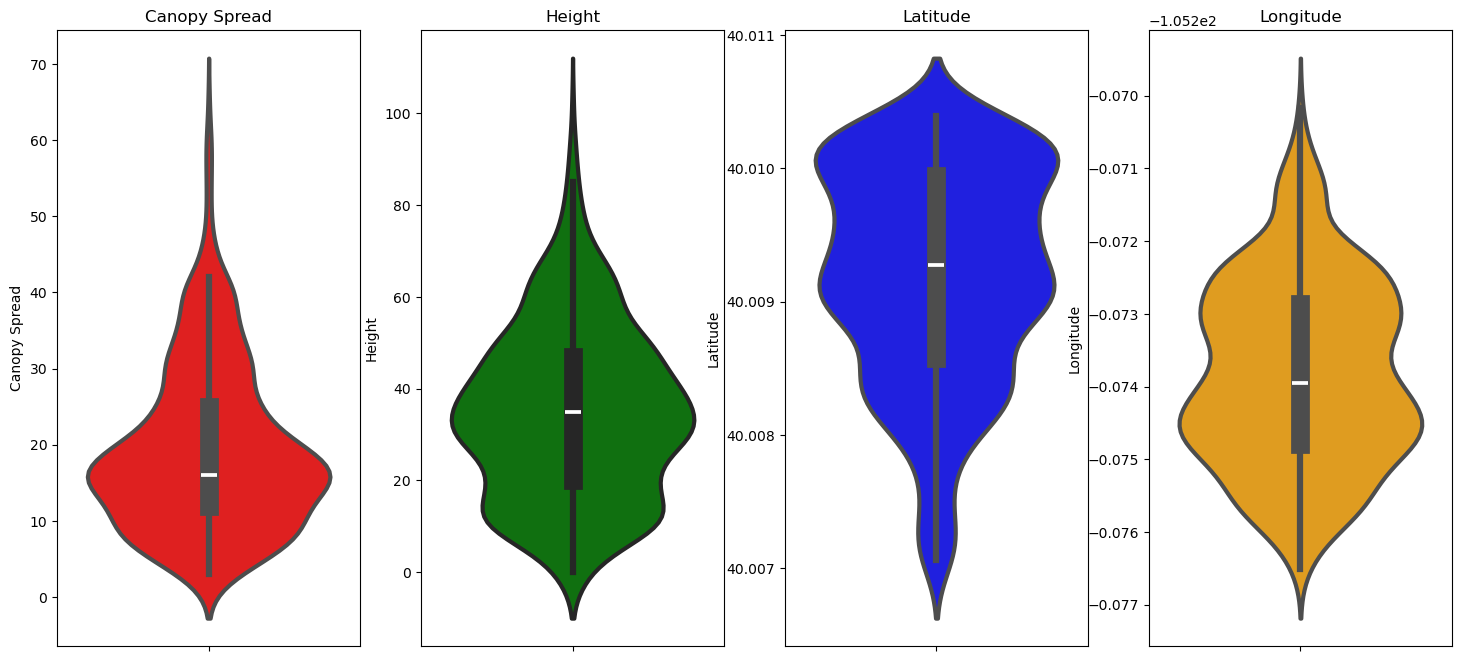

In [31]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Canopy Spread')
sns.violinplot(y='Canopy Spread',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Height')
sns.violinplot(y='Height',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Latitude')
sns.violinplot(y='Latitude',data=df,color='blue',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Longitude')
sns.violinplot(y='Longitude',data=df,color='orange',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [ ]:
Categories in 'Tree Type' variable:      ['DECIDUOUS' 'CONIFEROUS']
Top 5 categories in 'Genus' variable:   ['Quercus' 'Gymnocladus' 'Crataegus' 'Gleditsia' 'Sorbus']
Top 5 categories in'Species' variable: ['bicolor' 'dioicus' 'rubra' 'mollis' 'triacanthos']
Top 5 categories in 'Common Name' variable:      ['Swamp White Oak' 'Kentucky Coffeetree' 'Northern Red Oak' 'Hawthorne'
 'Honey Locust']
Categories in 'Cultivar or Varietal' variable:      [nan 'Pacific Sunset' 'Grandiflora' '"Heritage"  Bur\\English hybrid'
 'Rocky Mtn Glow' 'Caddo']

#### 4.3 Multivariate analysis using pieplot

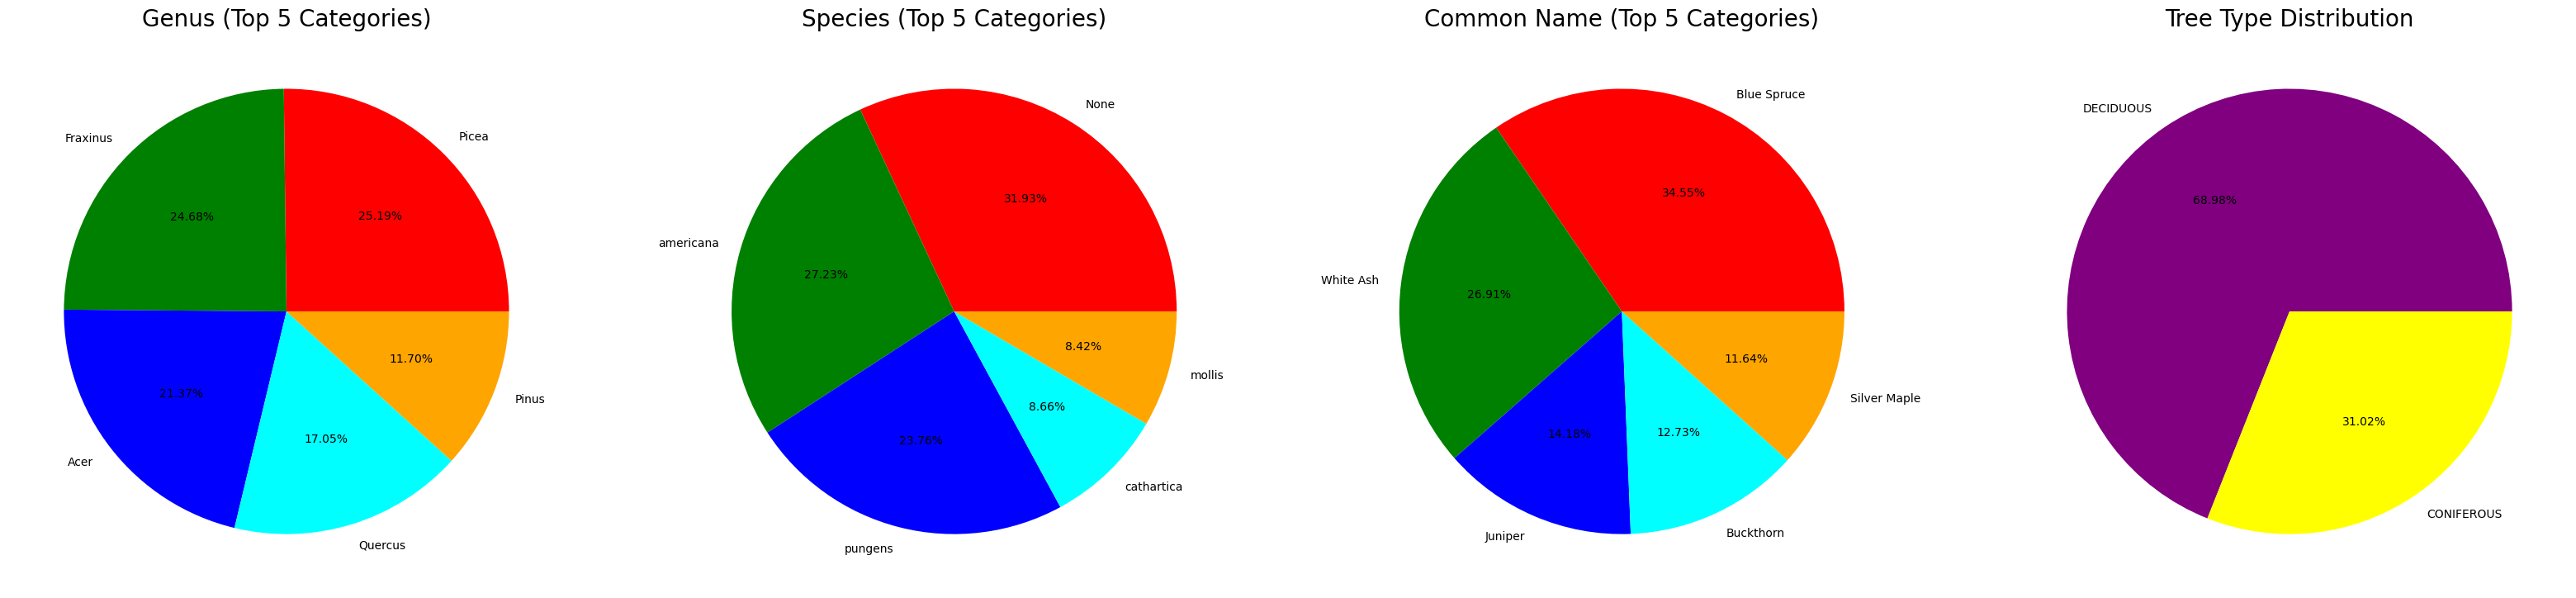

In [32]:
# Set figure size
plt.rcParams['figure.figsize'] = (40, 12)

# Define colors for all pie charts
colors = ['red', 'green', 'blue', 'cyan', 'orange']

# Create a subplot with 1 row, 4 columns
fig, axes = plt.subplots(1, 4, figsize=(40, 12))

# Plot for Genus (Top 5)
size_genus = df_updated['Genus'].value_counts()[:5]
labels_genus = df_updated['Genus'].value_counts().index[:5]
axes[0].pie(size_genus, colors=colors, labels=labels_genus, autopct='%.2f%%')
axes[0].set_title('Genus (Top 5 Categories)', fontsize=20)
axes[0].axis('off')

# Plot for Species (Top 5)
size_species = df_updated['Species'].value_counts()[:5]
labels_species = df_updated['Species'].value_counts().index[:5]
axes[1].pie(size_species, colors=colors, labels=labels_species, autopct='%.2f%%')
axes[1].set_title('Species (Top 5 Categories)', fontsize=20)
axes[1].axis('off')

# Plot for Common Name (Top 5)
size_common = df_updated['Common Name'].value_counts()[:5]
labels_common = df_updated['Common Name'].value_counts().index[:5]
axes[2].pie(size_common, colors=colors, labels=labels_common, autopct='%.2f%%')
axes[2].set_title('Common Name (Top 5 Categories)', fontsize=20)
axes[2].axis('off')

# Plot for Tree Type (Full Size Distribution)
size_tree_type = df_updated['Tree Type'].value_counts()
labels_tree_type = df_updated['Tree Type'].value_counts().index
axes[3].pie(size_tree_type, colors=['purple', 'yellow'], labels=labels_tree_type, autopct='%.2f%%')
axes[3].set_title('Tree Type Distribution', fontsize=20)
axes[3].axis('off')

# Show the plots
plt.show()

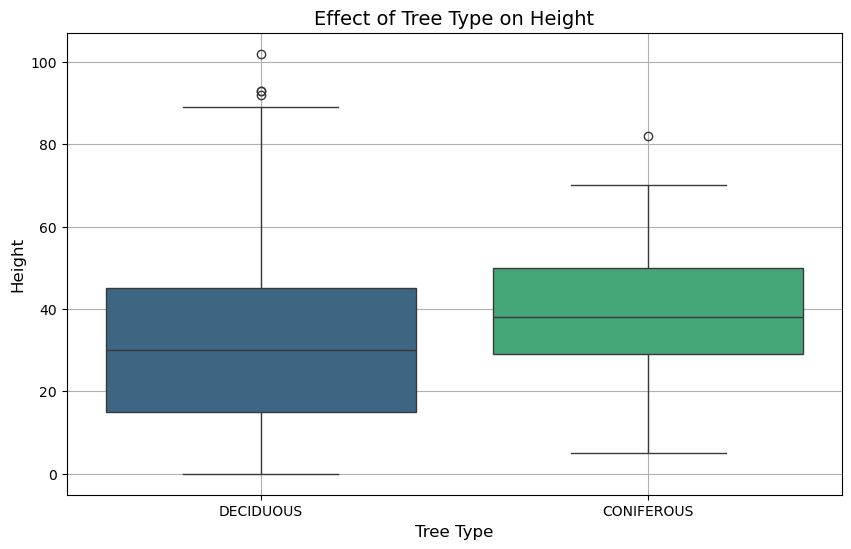

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_updated, x='Tree Type', y='Height', palette='viridis')
plt.title('Effect of Tree Type on Height', fontsize=14)
plt.xlabel('Tree Type', fontsize=12)
plt.ylabel('Height', fontsize=12)
plt.grid(True)
plt.show()

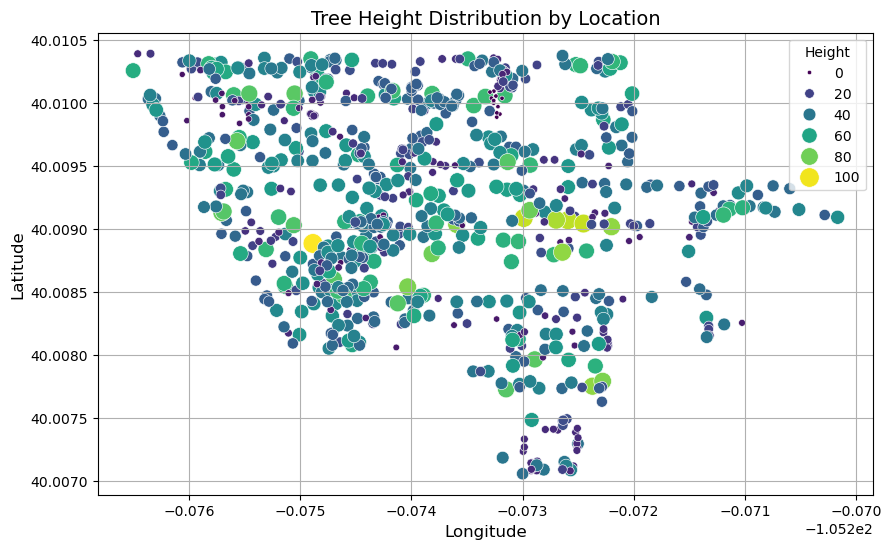

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_updated, x='Longitude', y='Latitude', hue='Height', palette='viridis', size='Height', sizes=(10, 200))
plt.title('Tree Height Distribution by Location', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Height', loc='upper right')
plt.grid(True)
plt.show()


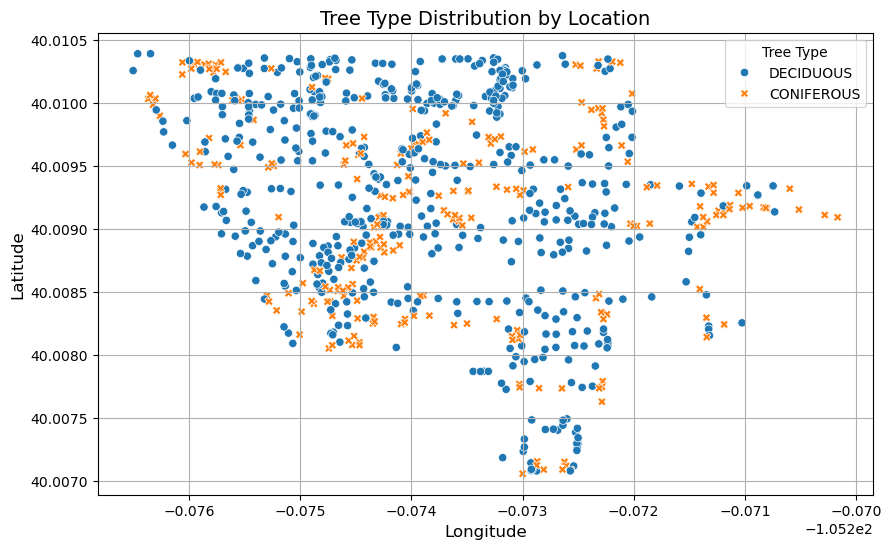

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_updated, x='Longitude', y='Latitude', hue='Tree Type', style='Tree Type', palette='tab10')
plt.title('Tree Type Distribution by Location', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Tree Type', loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns
correlation = df[['Height', 'Canopy_Spread']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")


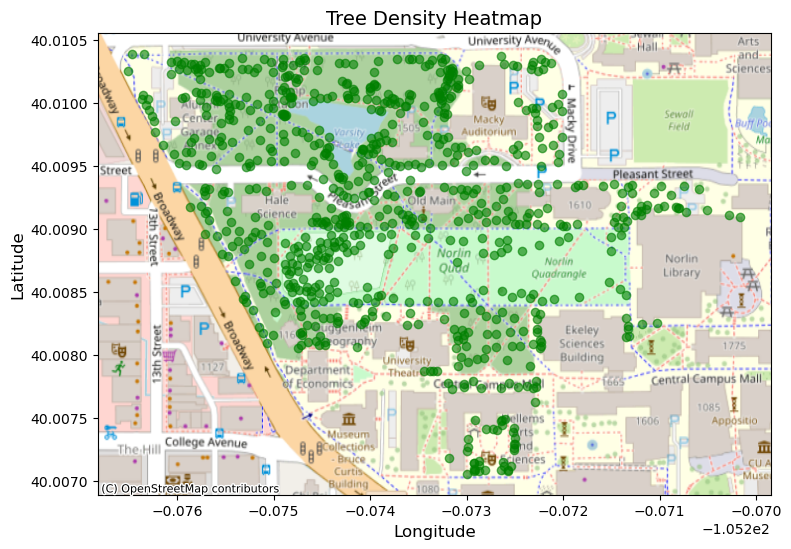

In [39]:
import geopandas as gpd
import contextily as ctx

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_updated, geometry=gpd.points_from_xy(df_updated.Longitude, df_updated.Latitude))

# Ensure CRS is set
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, alpha=0.6, marker='o', color='green')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Tree Density Heatmap", fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


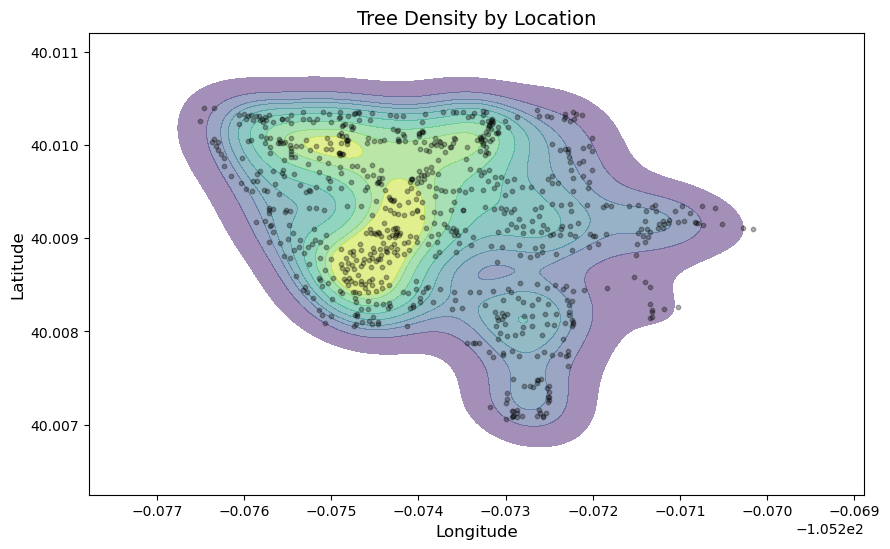

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_updated, x='Longitude', y='Latitude', fill=True, cmap='viridis', alpha=0.5)
plt.scatter(df_updated['Longitude'], df_updated['Latitude'], s=10, c='black', alpha=0.3)
plt.title('Tree Density by Location', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

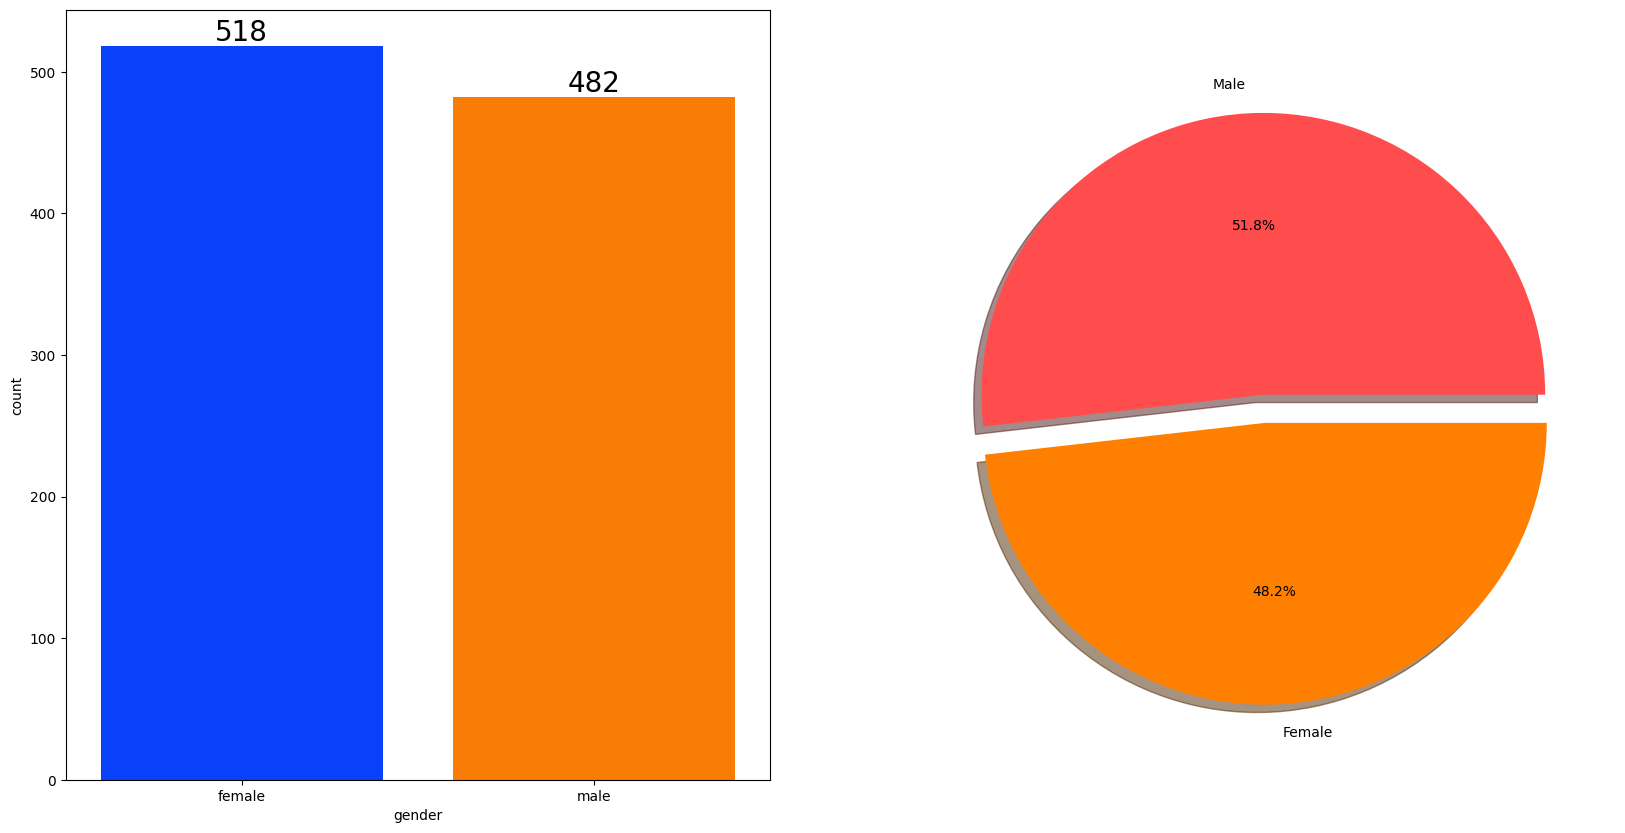

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [67]:
gender_group = df[['math_score', 'reading_score', 'writing_score','total score','average','gender']].groupby('gender').mean()
gender_group.head()

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


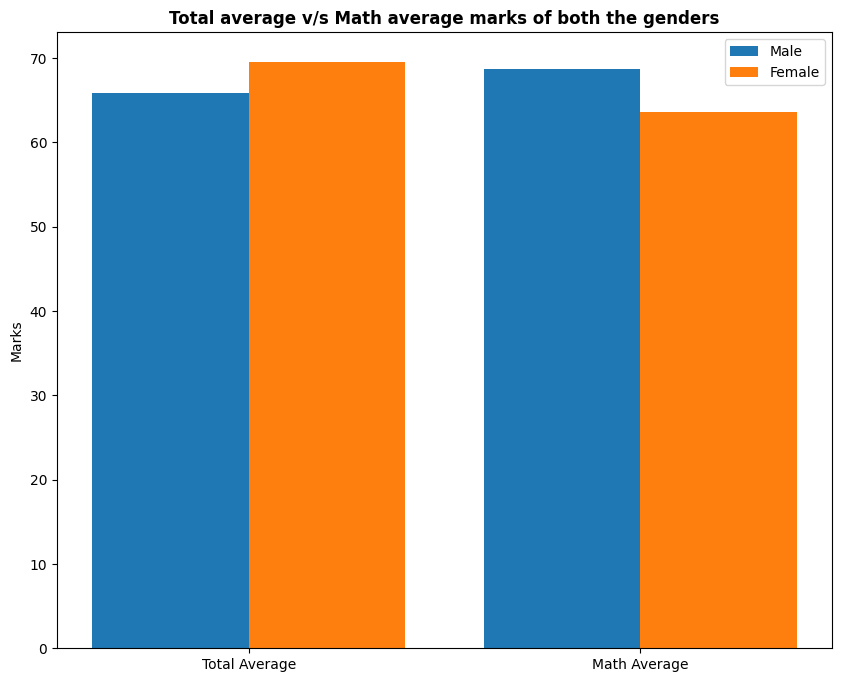

In [66]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

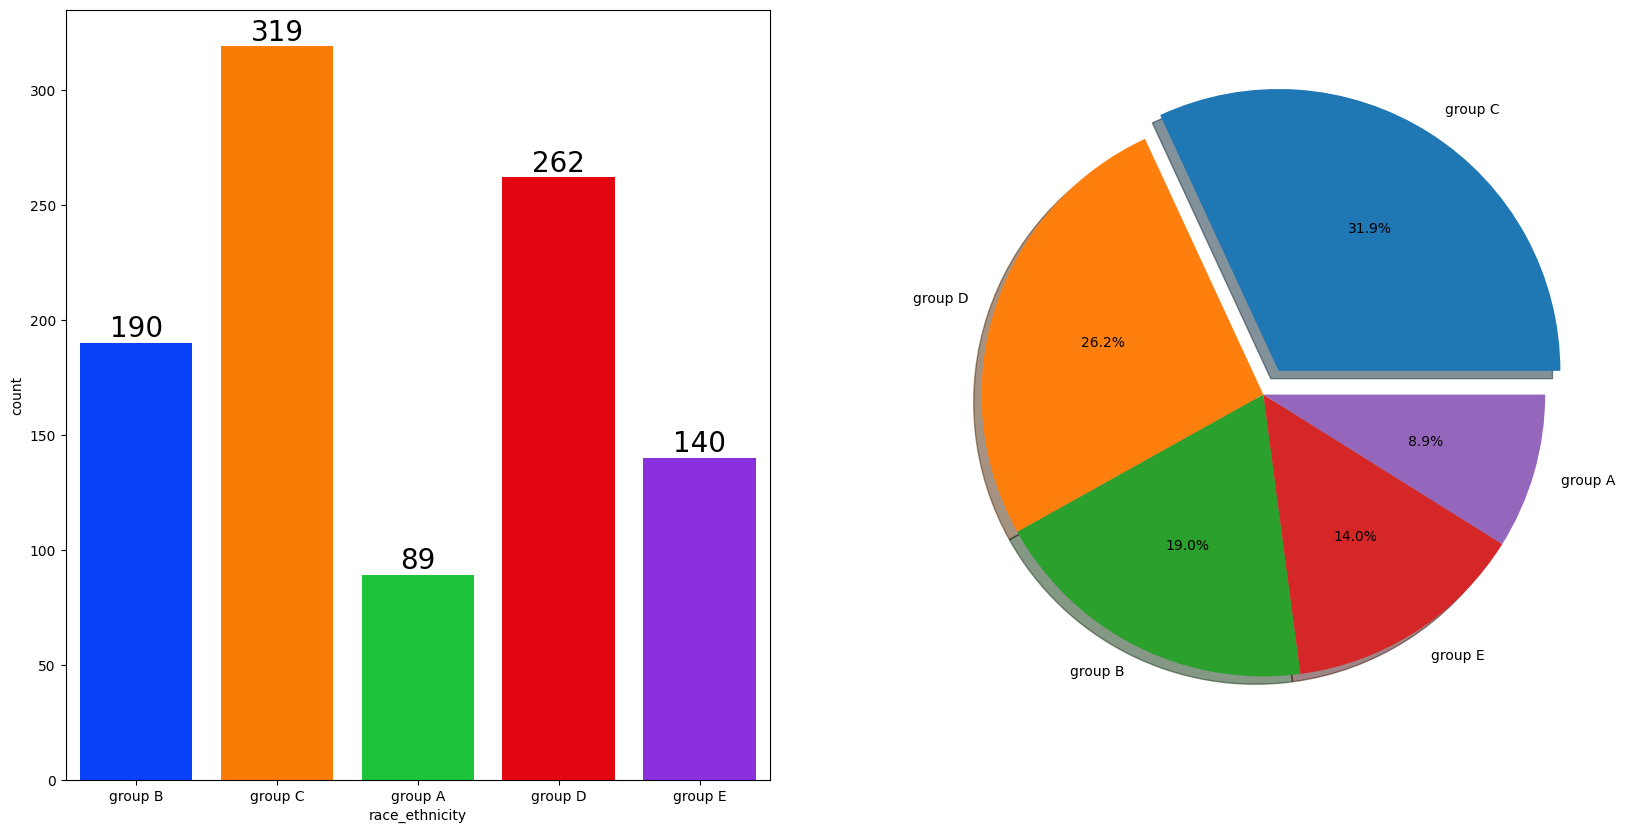

In [68]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

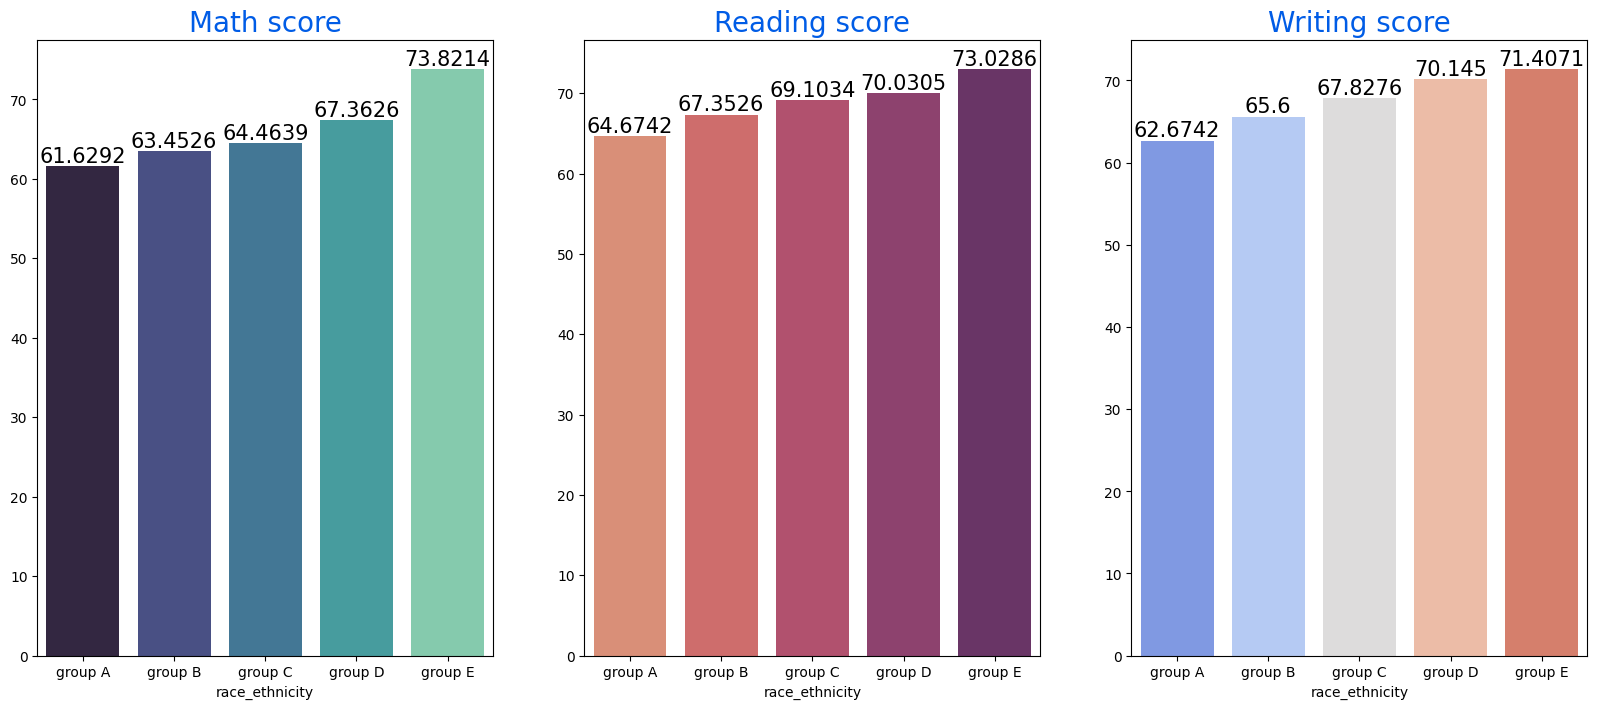

In [70]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

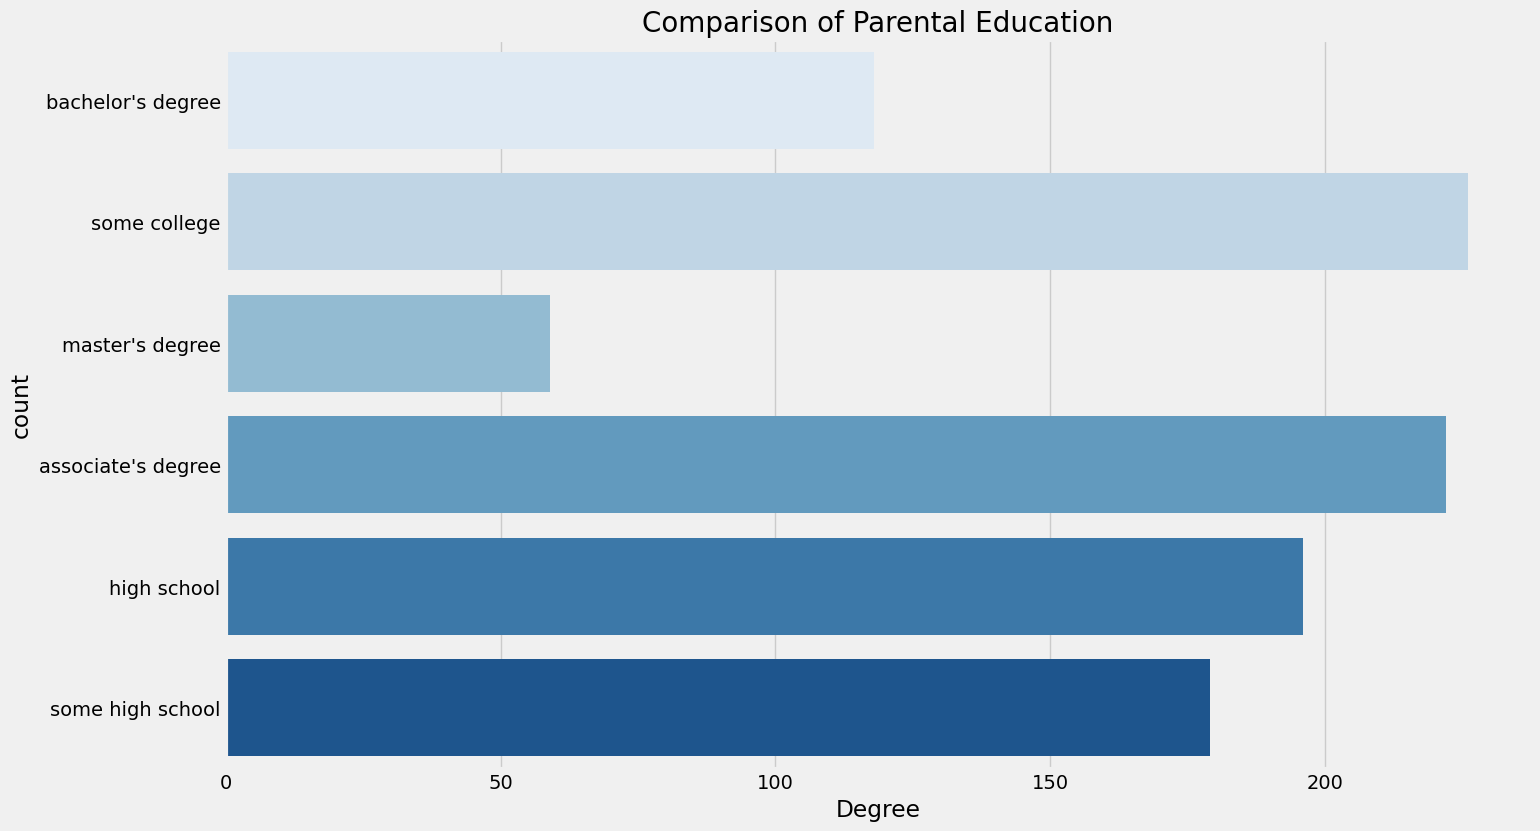

In [71]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

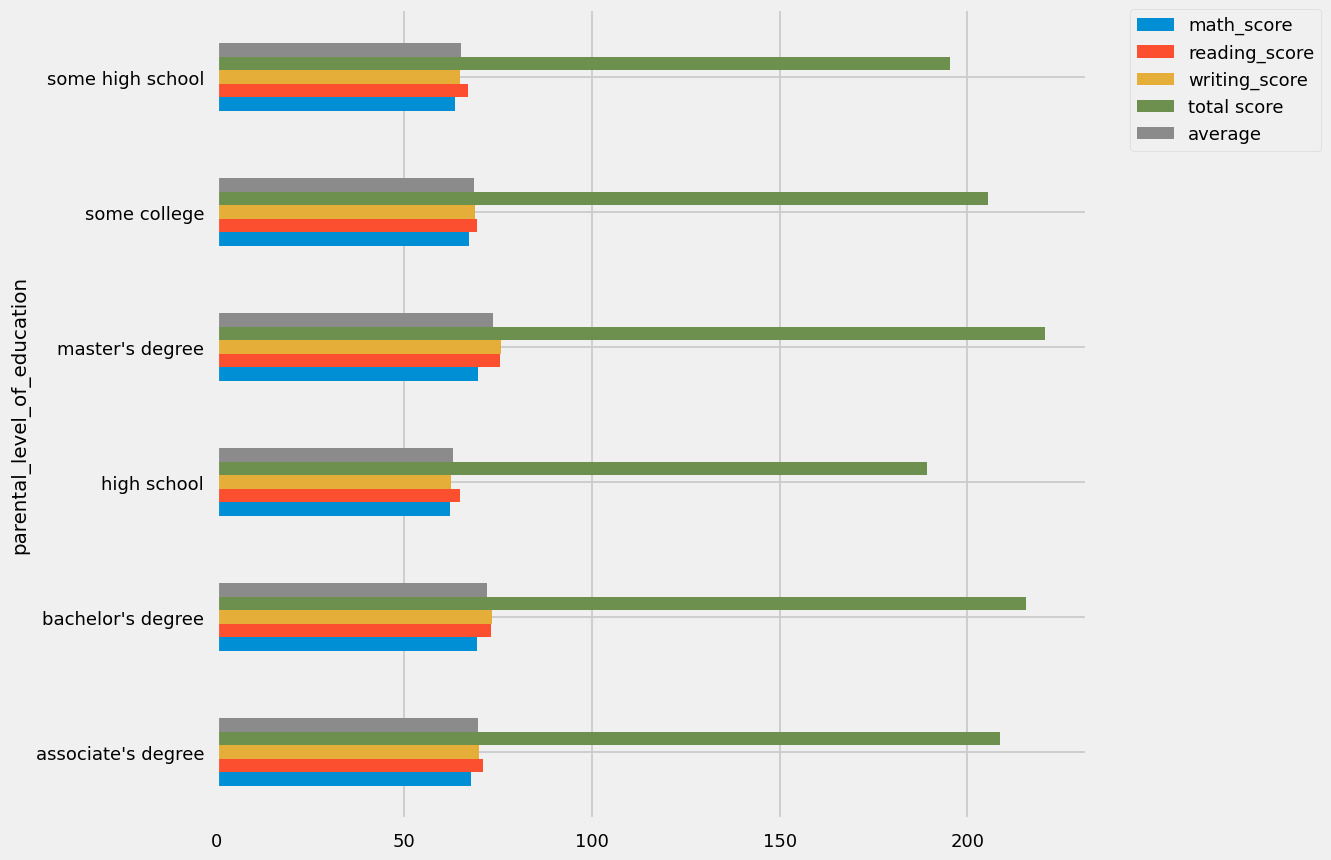

In [81]:
df[['math_score', 'reading_score', 'writing_score','total score','average','parental_level_of_education']].groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

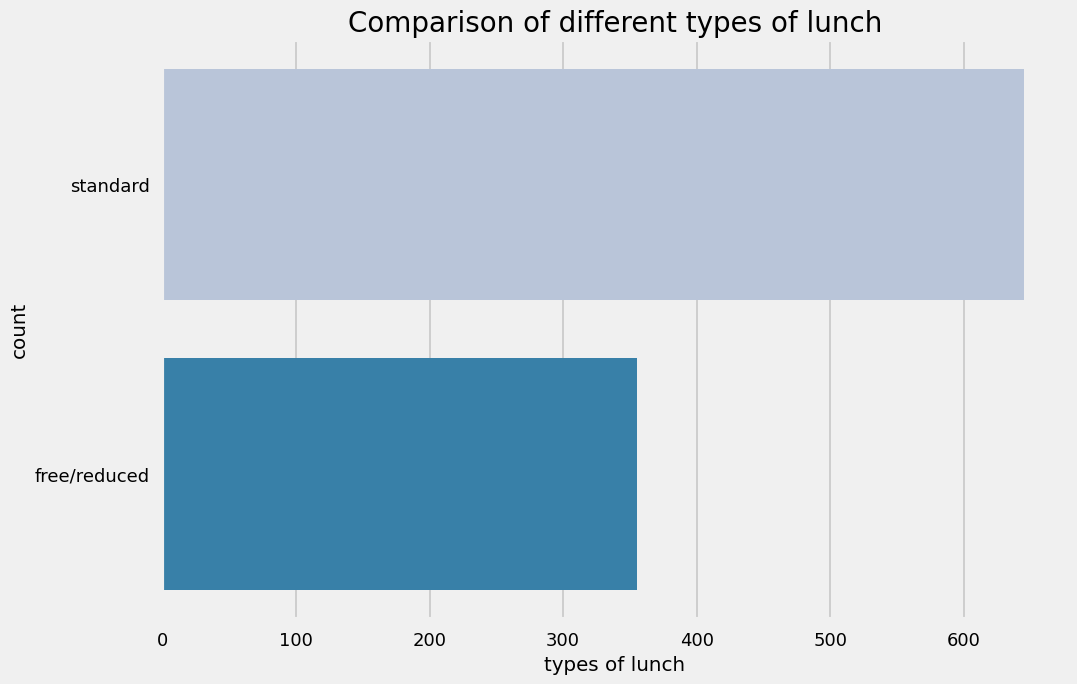

In [73]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

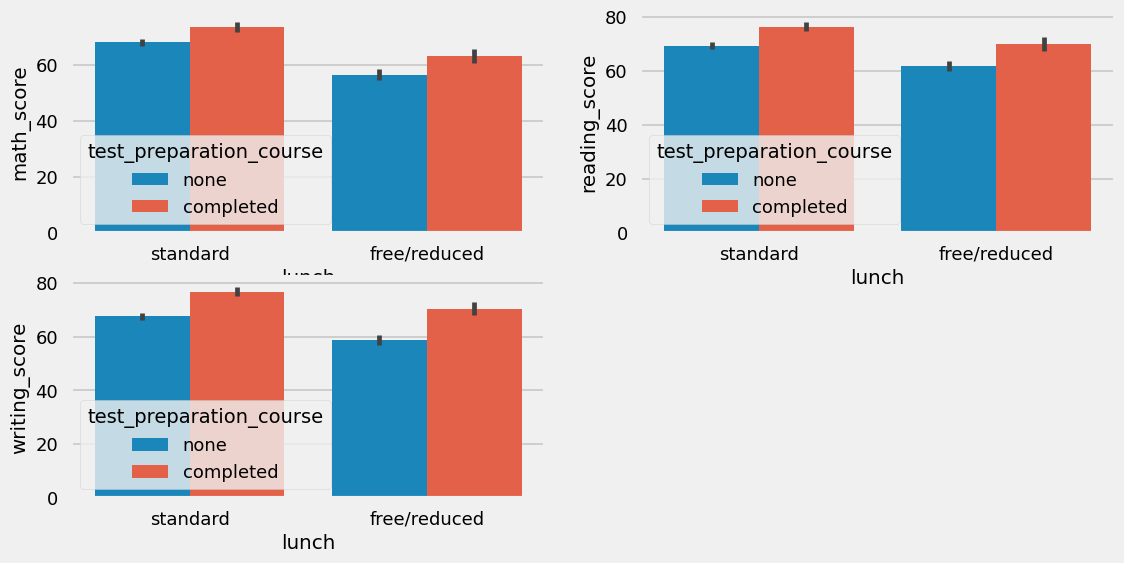

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

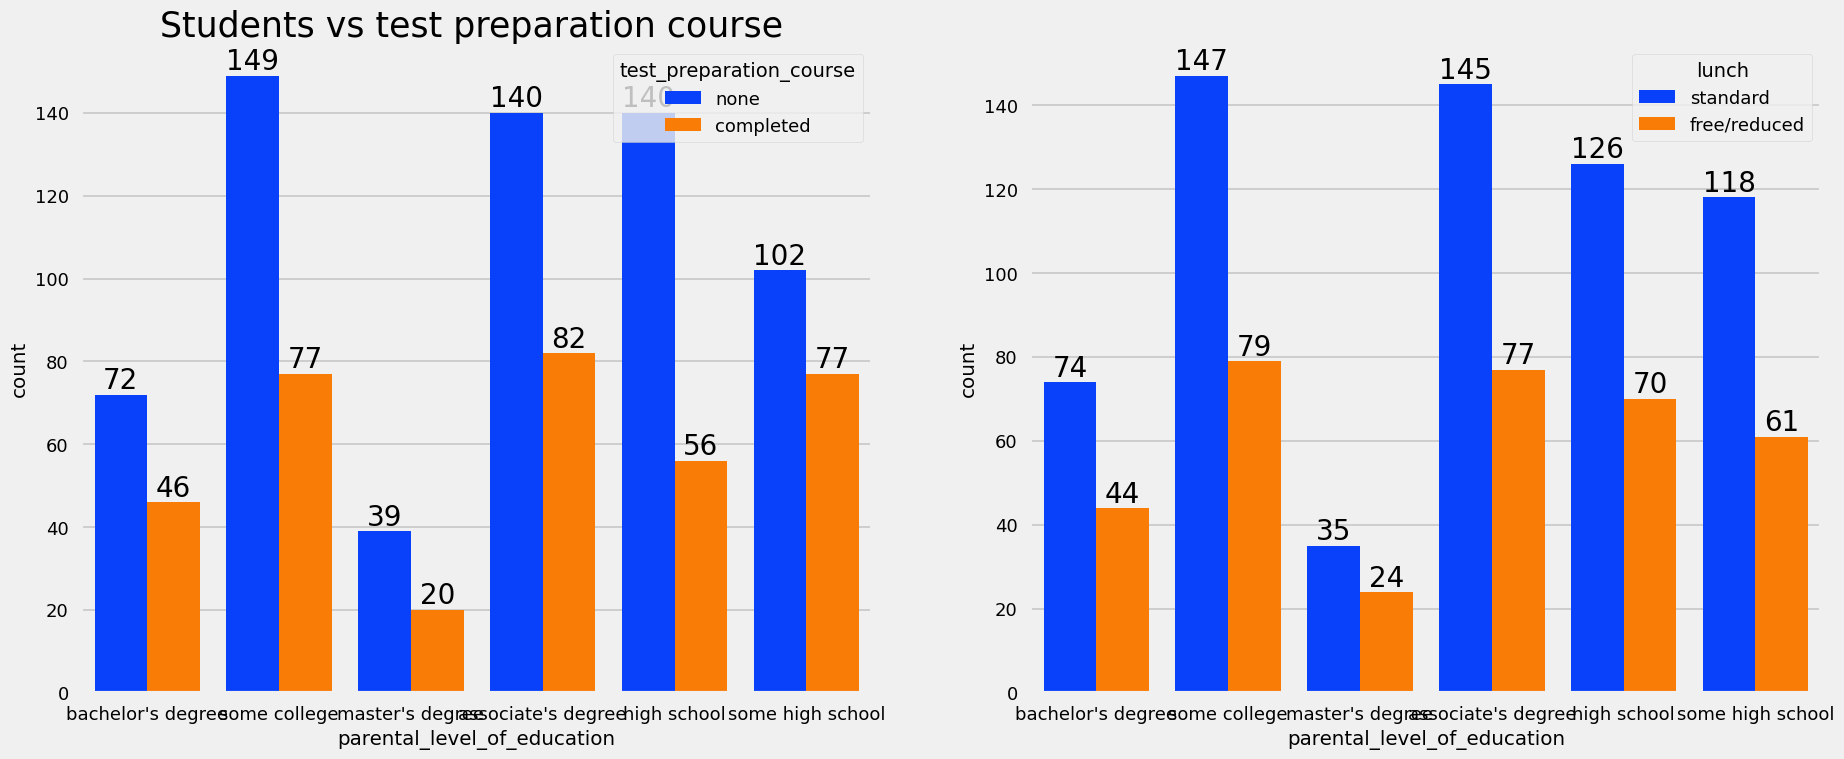

In [84]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

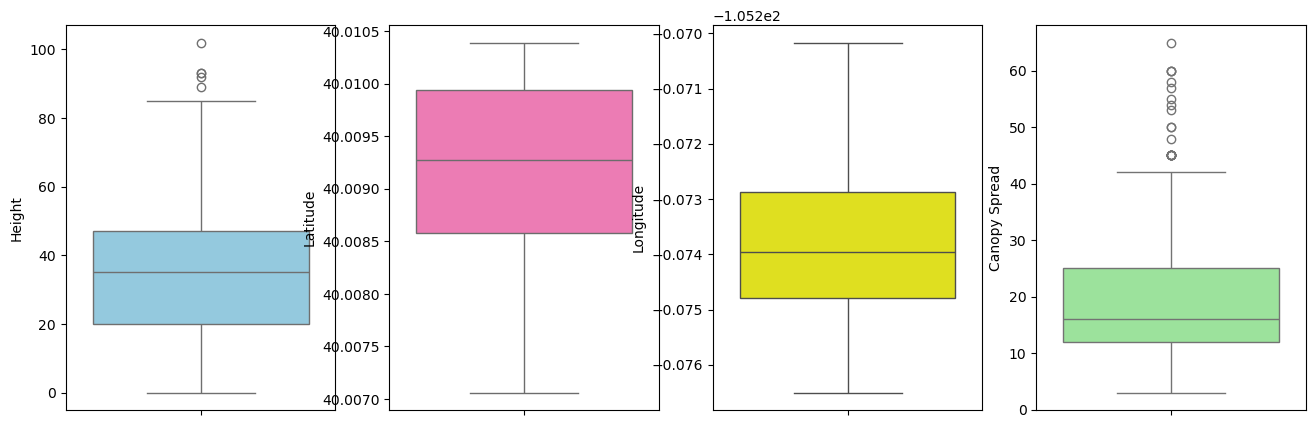

In [41]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df_updated['Height'],color='skyblue')
plt.subplot(142)
sns.boxplot(df_updated['Latitude'],color='hotpink')
plt.subplot(143)
sns.boxplot(df_updated['Longitude'],color='yellow')
plt.subplot(144)
sns.boxplot(df_updated['Canopy Spread'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

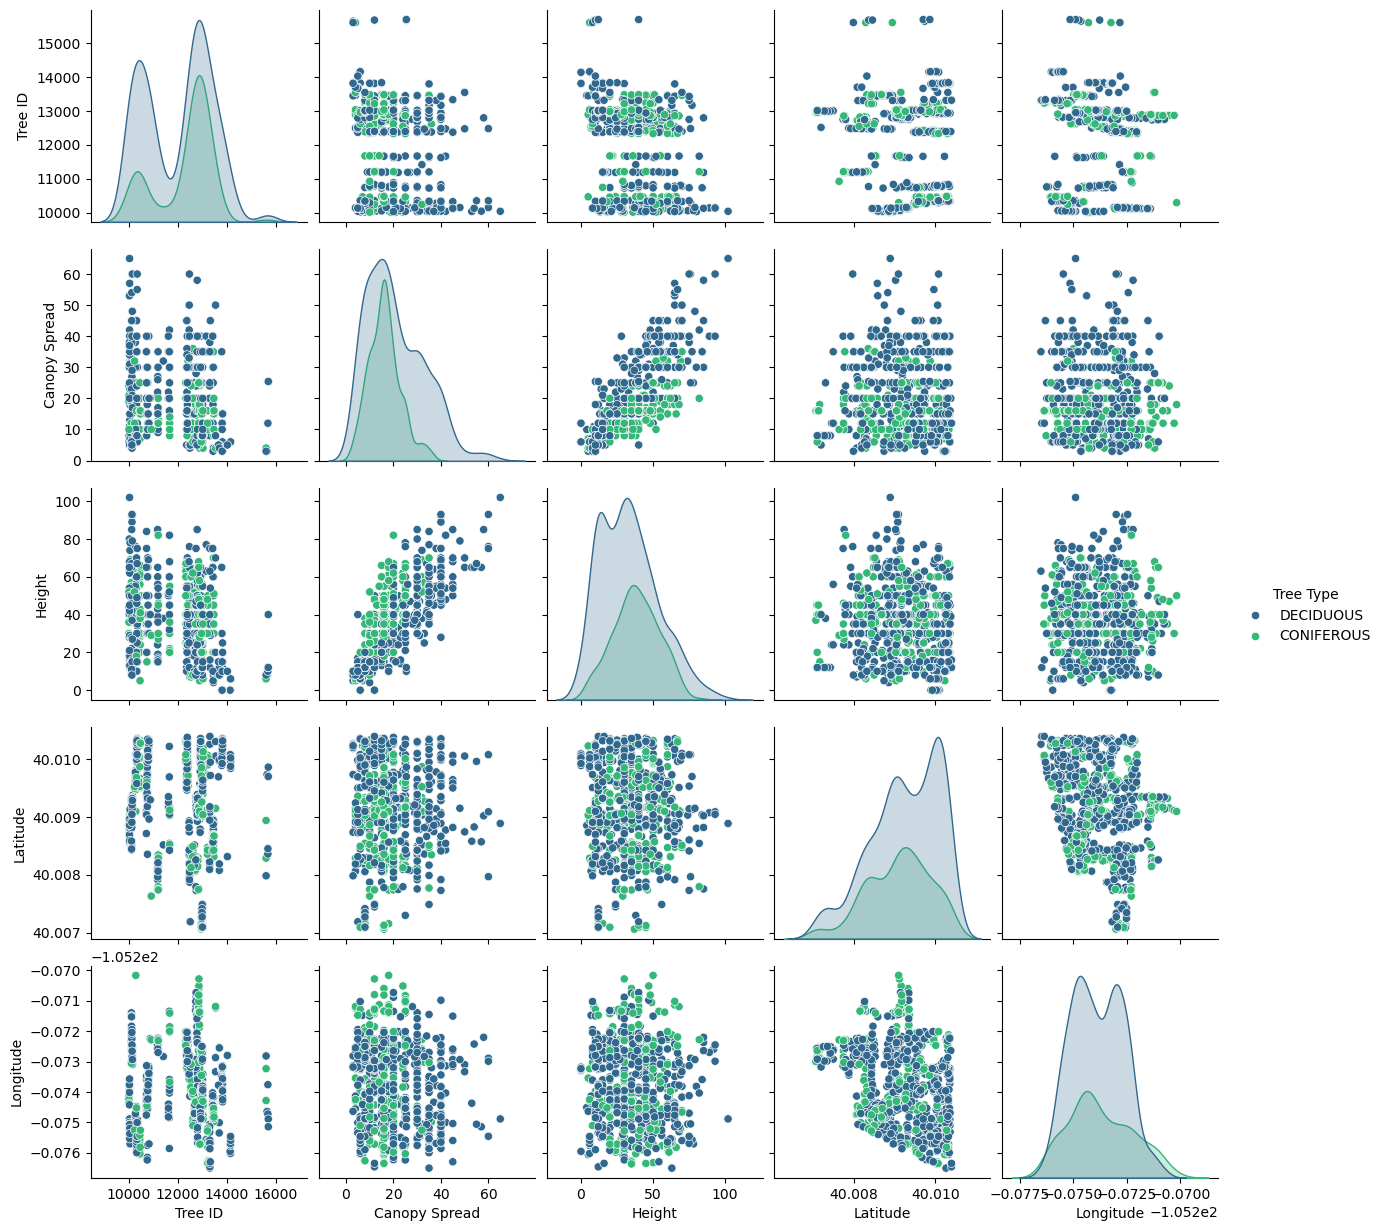

In [40]:
sns.pairplot(df_updated,hue = 'Tree Type',palette='viridis')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [89]:
import seaborn as sns
correlation = df[['Height', 'Canopy_Spread']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")


KeyError: "['Canopy_Spread'] not in index"

In [106]:
df_updated.head()


,Tree ID,Tree Type,Genus,Species,Common Name,Canopy Spread,Height,Latitude,Longitude
0,10146,DECIDUOUS,Quercus,bicolor,Swamp White Oak,19.0,21.0,40.009104,-105.272529
1,10150,DECIDUOUS,Gymnocladus,dioicus,Kentucky Coffeetree,31.0,47.0,40.009136,-105.272797
2,10041,DECIDUOUS,Quercus,rubra,Northern Red Oak,65.0,102.0,40.008888,-105.274886
3,10042,DECIDUOUS,Quercus,rubra,Northern Red Oak,42.0,54.0,40.008775,-105.275000
4,10051,DECIDUOUS,Crataegus,mollis,Hawthorne,18.0,20.0,40.008870,-105.275428


In [112]:
import plotly.express as px

fig = px.scatter(df, x="Height", y="Canopy Spread", title="Tree Height vs. Canopy Spread")
fig.show()
